In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#import statsmodels.api as sm
#import statsmodels.stats.api as sms
#from statsmodels.stats.proportion import proportion_confint
#import pylab
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [199]:
data_1 = pd.read_csv('hcmv-263hxkx-1qhtfgz.txt')

In [200]:
# from original data set, n = 296 (Palindromes), N = 229354 (Base pairs)
n, N = 296, 229354

In [201]:
# Generate three uniformed distributed 
samples = [pd.Series(np.random.uniform(0,N,n)).sort_values() for i in range(3)]

# Random Scatter

Text(0.5, 1.0, 'Location of Palindromes')

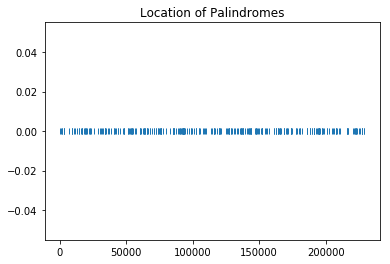

In [202]:
#'Location of Palindromes'
plt.plot(data_1.location, np.zeros_like(data_1.location) + 0, '|')
plt.title('Location of Palindromes')

Text(0.5, 1.0, 'similated data 1')

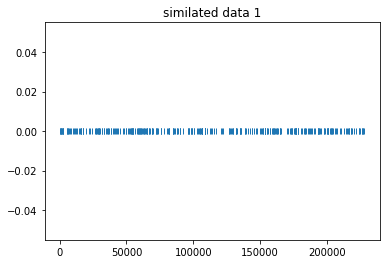

In [203]:
# Location of three simulated samples
#for i in samples:
plt.plot(samples[0], np.zeros_like(samples[0]) + 0, '|')
plt.title('similated data 1')

Text(0.5, 1.0, 'similated data 2')

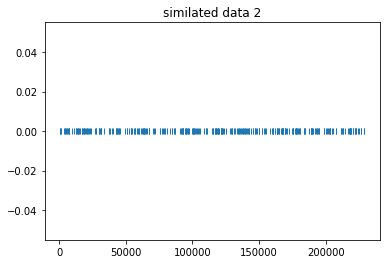

In [204]:
plt.plot(samples[1], np.zeros_like(samples[1]) + 0, '|')
plt.title('similated data 2')

Text(0.5, 1.0, 'similated data 3')

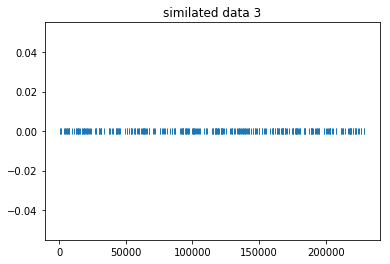

In [205]:
plt.plot(samples[1], np.zeros_like(samples[2]) + 0, '|')
plt.title('similated data 3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25dcd940>]],
      dtype=object)

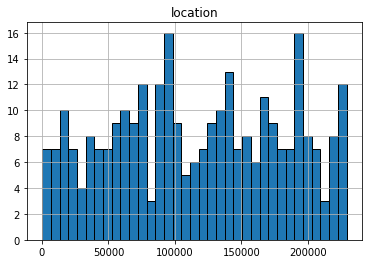

In [206]:
data_1.hist(bins = 35, edgecolor = 'k')

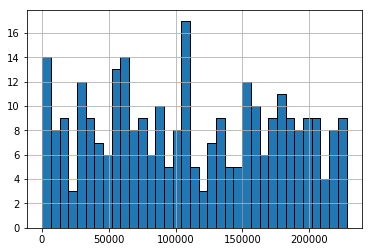

In [207]:
pd.Series(samples[0]).sort_values().reset_index()[0].hist(bins = 35, edgecolor = 'k')

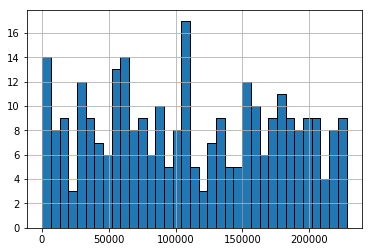

In [208]:
pd.Series(samples[0]).hist(bins = 35, edgecolor = 'k')

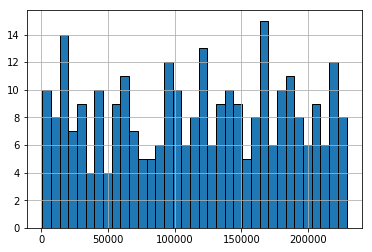

In [209]:
pd.Series(samples[1]).hist(bins = 35, edgecolor = 'k')

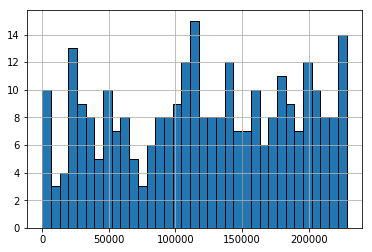

In [210]:
pd.Series(samples[2]).hist(bins = 35, edgecolor = 'k')

In [211]:
data_1 = data_1.assign(distance_from_previouse_palindrome\
                       = data_1.location.diff().set_value(0, np.NaN))

/Users/syeehyn/anaconda3/envs/UCSD/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Text(0.5, 1.0, 'distance_from_previouse_palindrome')

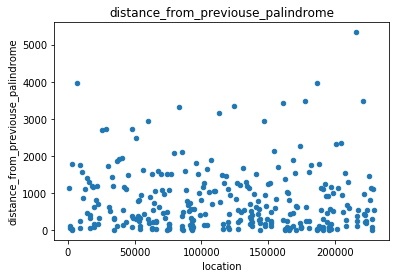

In [212]:
data_1.plot(kind = 'scatter', x = 'location', y = 'distance_from_previouse_palindrome')
plt.title('distance_from_previouse_palindrome')

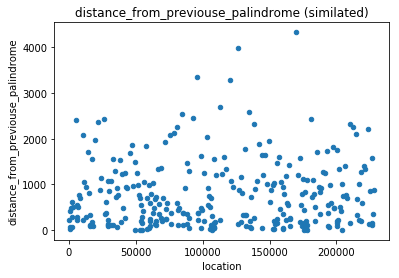

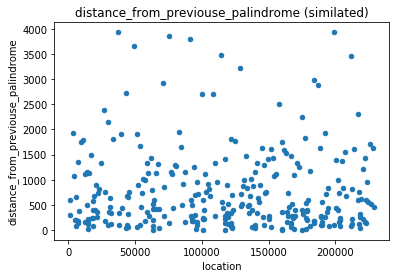

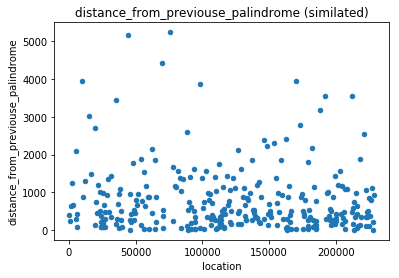

In [220]:
df_lst = []
for i in samples:
    df_lst += [
        pd.DataFrame(
                {
                    'location' : i[1:]
                }
        ).assign(distance_from_previouse_palindrome = i.diff().iloc[1:])\
    ]
for i in df_lst:
    i.plot(kind = 'scatter', x = 'location', y = 'distance_from_previouse_palindrome')
    plt.title('distance_from_previouse_palindrome (similated)')

In [221]:
# Counts for overlapping palinromes, We consider every 100 intervals as overlapping state
l1 = []
l2 = []
l3 = []
l4 = []
lst = [l2, l3, l4]
for i in range(100, 3000, 100):
    s = pd.cut(data_1.location, range(0, N+1, i)).value_counts()
    l1 += [s.where(s==1).count()]
    for j in range(len(samples)):
        s1 = pd.cut(samples[j], range(0, N+1, i)).value_counts()
        lst[j] += [s1.where(s1==1).count()]

In [222]:
compare_data = pd.DataFrame({
    'original_data': l1,
    'simulated_data1': l2,
    'simulated_data2': l3,
    'simulated_data3': l4
})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a264f74a8>,
      dtype=object)

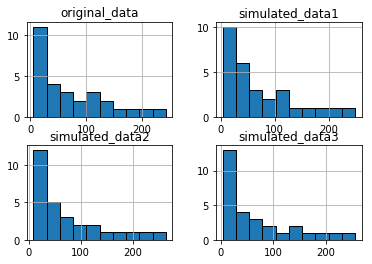

In [223]:
compare_data.hist(bins = 10, edgecolor = 'k')

In [224]:
stats.chisquare(compare_data.original_data, compare_data.simulated_data1)

Power_divergenceResult(statistic=29.611547937932787, pvalue=0.38202278491400854)

# Location and Spacing

In [225]:
# interval 4000

In [226]:
spacing = data_1.location.diff()
spacing_1 = pd.Series(samples[0]).diff()
spacing_2 = pd.Series(samples[1]).diff()
spacing_3 = pd.Series(samples[2]).diff()

Text(0.5, 1.0, 'spacing histogram of original data set')

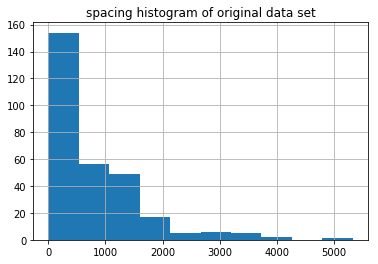

In [227]:
spacing.hist()
plt.title('spacing histogram of original data set')

Text(0.5, 1.0, 'spacing histogram of simulated 1 set')

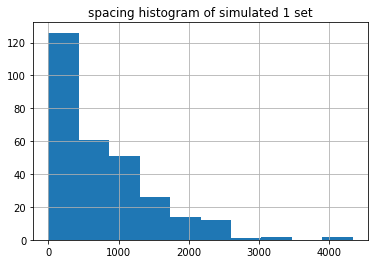

In [228]:
spacing_1.hist()
plt.title('spacing histogram of simulated 1 set')

Text(0.5, 1.0, 'spacing histogram of simulated 2 set')

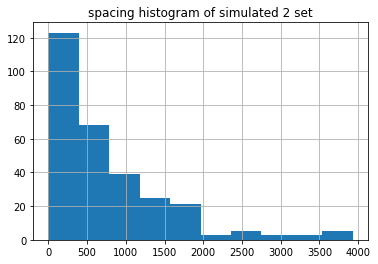

In [229]:
spacing_2.hist()
plt.title('spacing histogram of simulated 2 set')

Text(0.5, 1.0, 'spacing histogram of simulated 3 set')

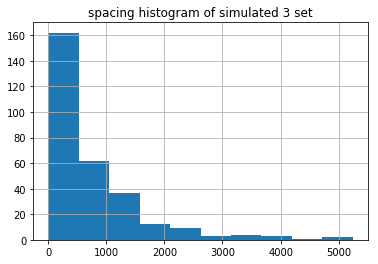

In [230]:
spacing_3.hist()
plt.title('spacing histogram of simulated 3 set')

In [253]:
# Sum of two consecutive pairs, and spacing. 

In [321]:
diff_pair_table = pd.DataFrame(
    {'spacing of original data distance two pairs':data_1.location.iloc[range(0,len(data_1),2)].diff().reset_index(drop = True),
     'spacing of sample_1 data distance two pairs': samples[0].iloc[range(0,len(samples[0]),2)].diff().reset_index(drop = True),
     'spacing of sample_2 data distance two pairs': samples[1].iloc[range(0,len(samples[1]),2)].diff().reset_index(drop = True),
     'spacing of sample_3 data distance two pairs': samples[2].iloc[range(0,len(samples[2]),2)].diff().reset_index(drop = True)
    })

In [328]:
diff_pair_table.head()

,spacing of original data distance two pairs,spacing of sample_1 data distance two pairs,spacing of sample_2 data distance two pairs,spacing of sample_3 data distance two pairs
0,NaN,NaN,NaN,NaN
1,1300.0,652.429880,2804.810474,1258.820448
2,1809.0,1143.943245,1934.792518,4009.530886
3,5798.0,864.147456,1637.357661,791.048158
4,2670.0,3165.267304,705.818577,6120.466011


In [302]:
diff_pair_table.columns[0]

'spacing of original data distance two pairs'

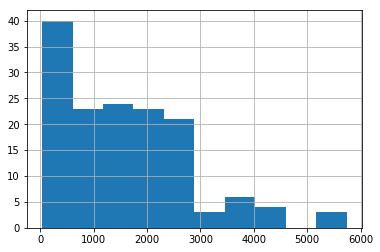

In [312]:
diff_pair_table.dropna().iloc[:,0].hist()
plt.title = (diff_pair_table.columns[0])

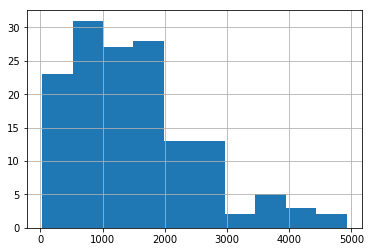

In [313]:
diff_pair_table.dropna().iloc[:,1].hist()
plt.title = (diff_pair_table.columns[1])

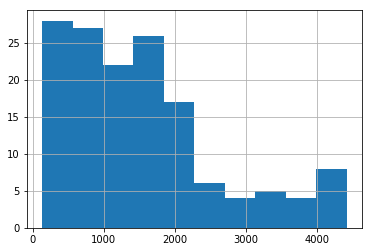

In [314]:
diff_pair_table.dropna().iloc[:,2].hist()
plt.title = (diff_pair_table.columns[2])

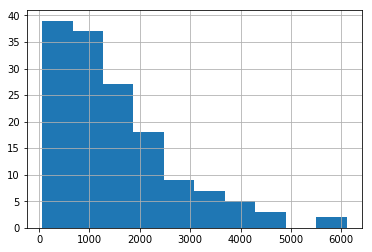

In [315]:
diff_pair_table.dropna().iloc[:,3].hist()
plt.title = (diff_pair_table.columns[3])

In [324]:
stats.chisquare(diff_pair_table.iloc[:,0].dropna(), diff_pair_table.iloc[:,1].dropna())

Power_divergenceResult(statistic=539551.2538835375, pvalue=0.0)

# Counts

# The Biggest Cluster

# Advance, how would you advice biologist?